# Water Quality Prediction

## This is a classification problem where we need to predict whether the water is potable or not.

**Dataset:-** https://raw.githubusercontent.com/amankharwal/Website-data/master/water_potability.csv

In [97]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#this is used to ignore the error while accessing the data

In [6]:
#reading the dataframe by calling an API
data_frame=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/water_potability.csv')

In [7]:
data_frame.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


- **ph:-** Measure of how acidic/basic water is. The values ranges from 0 to 14.
- **Hardness:-** 

## Checking out null values

In [8]:
data_frame.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

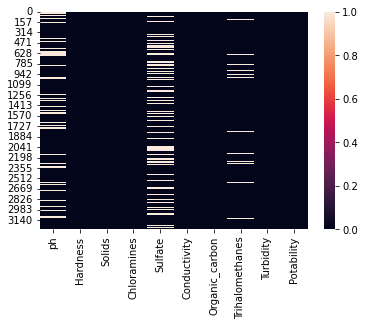

In [11]:
sns.heatmap(data_frame.isnull());

Features such as 'ph', 'Sulfate' and 'Trihalomethanes' contains null values.

## Visualizing the relation between null values and the target feature

In [102]:
data_frame.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [134]:
def null_value_visualization(col_name,target_col):
    #copying the dataframe
    data=data_frame.copy()
    #replacing the null values in the feature data with 'Null'
    data[col_name]=data[col_name].where(data[col_name].isnull()==True,'Null')
    values=[]
    #iterating through every value in the feature.
    for i in data[col_name]:
        #when the value of feature data is 'Null', then append 1 to values
        if i=='Null':
            values.append(1)
        #when the value of feature data is not 1, then append 0 to values
        else:
            values.append(0)
    sns.countplot(values,hue=data[target_col])
    plt.title('Relationship between null values of {} and Target(Potability) labels'.format(col_name))
    plt.show()
    data[col_name]=values
    null_value_potability=len(data[(data[target_col]==1)&(data[col_name]==1)])
    non_null_value_potability=len(data[(data[target_col]==1)&(data[col_name]==0)])
    null_value_non_potability=len(data[(data[target_col]==0)&(data[col_name]==1)])
    non_null_value_non_potability=len(data[(data[target_col]==0)&(data[col_name]==0)])
    if null_value_potability>null_value_non_potability:
        print('When the values are null, there are more count of {}({}) than Non-{}({}) label'.format(target_col,1,target_col,0))
    else:
        print('When the values are null, there are more count of Non-{}({}) than {}({}) label'.format(target_col,0,target_col,1))
    if non_null_value_potability>non_null_value_non_potability:
        print('When the values are not null, there are more count of {}({}) than Non-{}({}) label'.format(target_col,1,target_col,0))
    else:
        print('When the values are not null, there are more count of Non-{}({}) than {}({}) lable'.format(target_col,0,target_col,1))

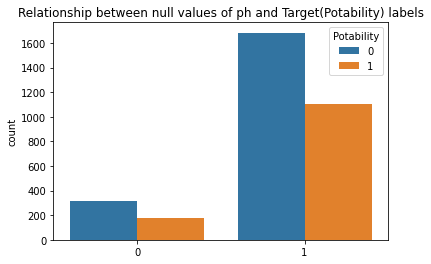

When the values are null, there are more count of Non-Potability(0) than Potability(1) label
When the values are not null, there are more count of Non-Potability(0) than Potability(1) lable


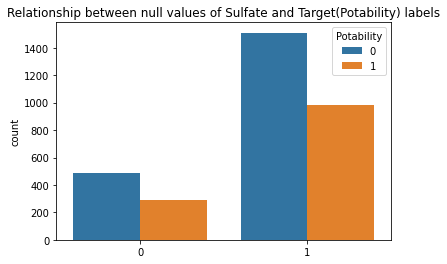

When the values are null, there are more count of Non-Potability(0) than Potability(1) label
When the values are not null, there are more count of Non-Potability(0) than Potability(1) lable


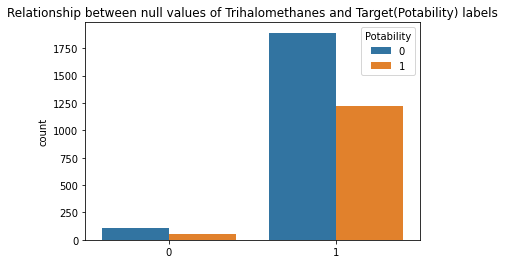

When the values are null, there are more count of Non-Potability(0) than Potability(1) label
When the values are not null, there are more count of Non-Potability(0) than Potability(1) lable


In [135]:
for null_cols in ['ph','Sulfate','Trihalomethanes']:
    null_value_visualization(null_cols,'Potability')

## Checking the relation between features

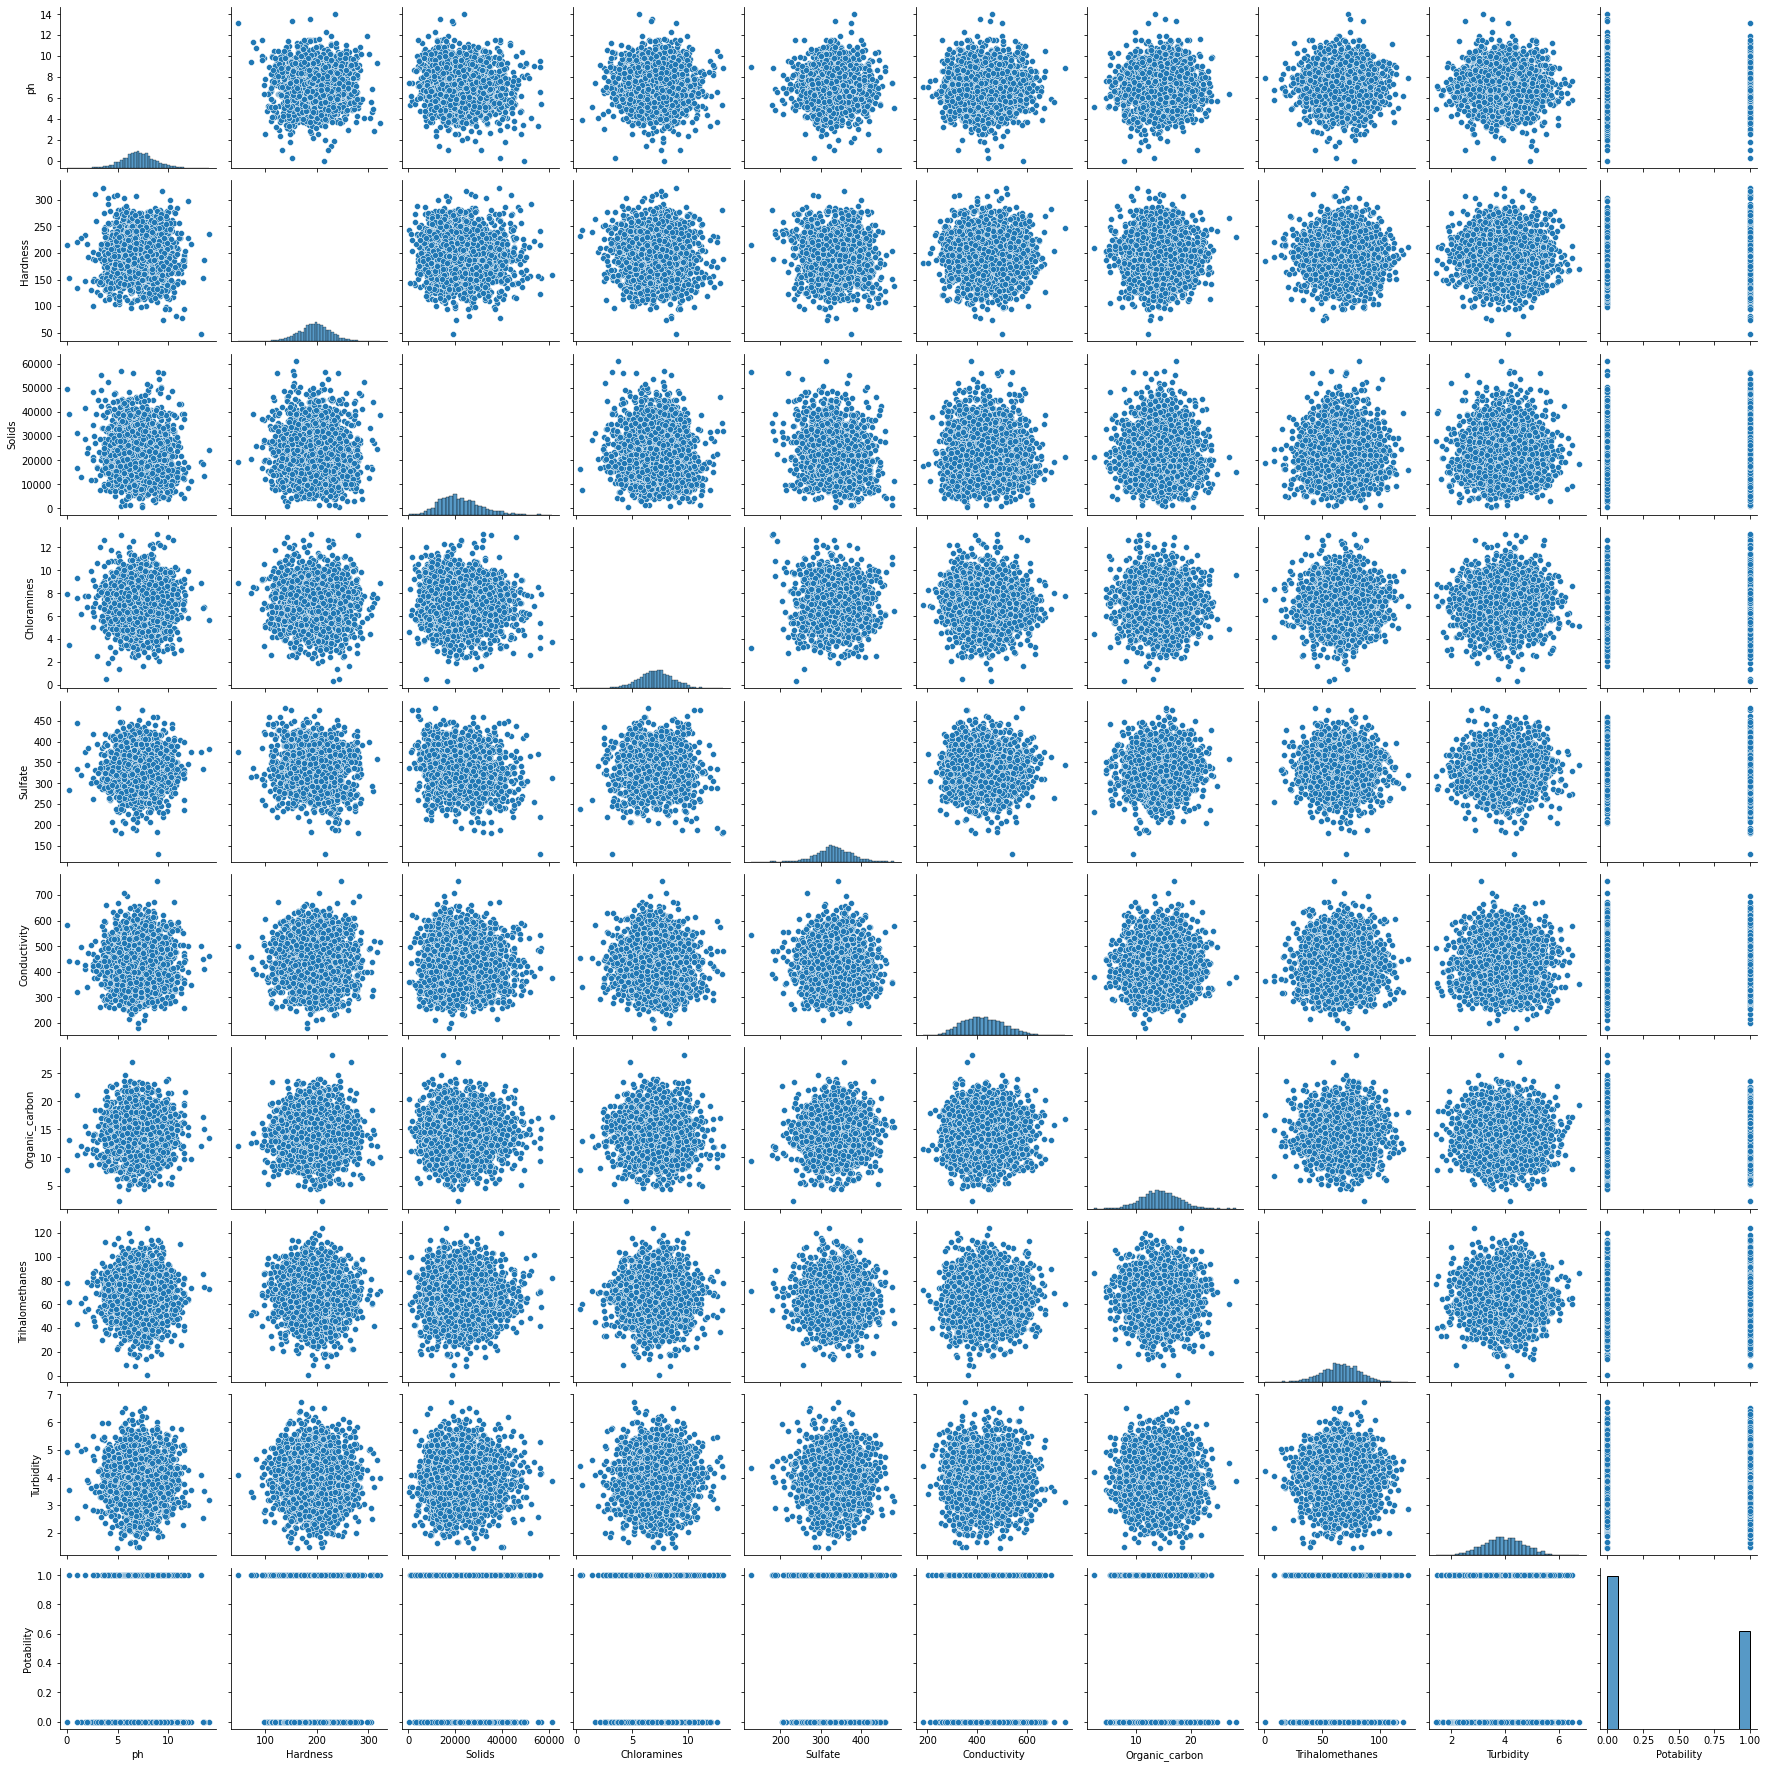

In [12]:
sns.pairplot(data_frame);

## Checking the correlation between the features

In [136]:
data_frame.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


2 Feature can be correlated either in positive way or in a negative way. The more the positive value is, the more the features are correlated. The less a value is moving towards negative way, the lesser the features are correlated.

**Visualizing the data using heatmap for a better understanding.**

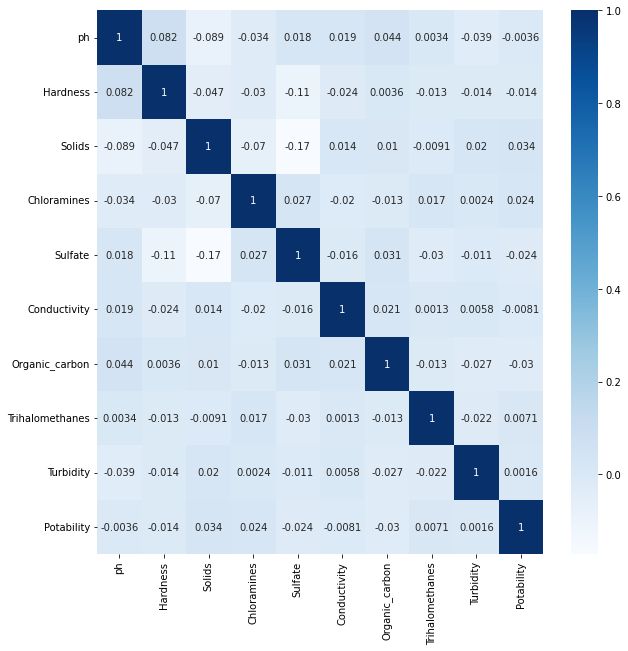

In [143]:
plt.figure(figsize=(10,10))
sns.heatmap(data_frame.corr(),annot=True,cmap='Blues');

No 2 features are correlated strongly

## Checking the outliers in features since, all the input features are continuos

## Visualizing outliers

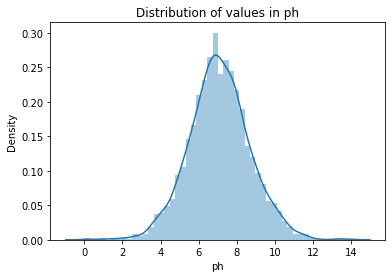

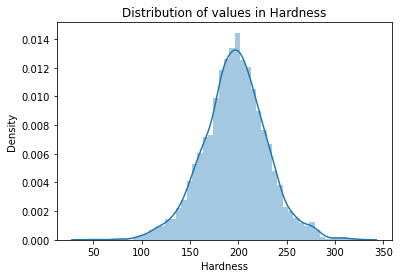

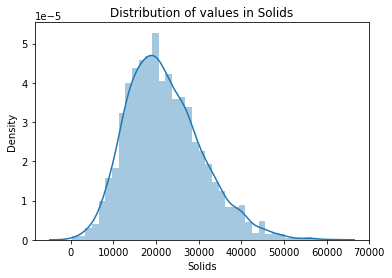

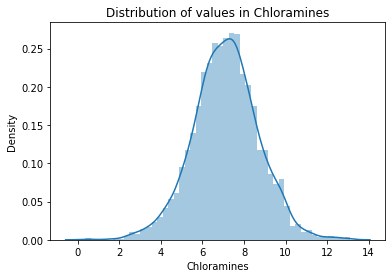

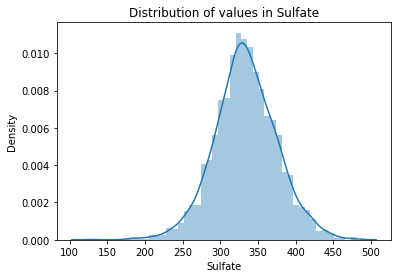

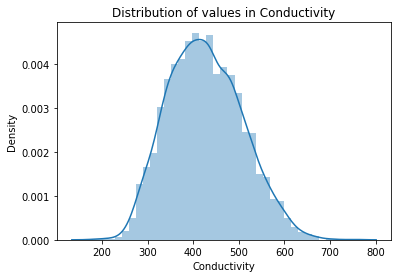

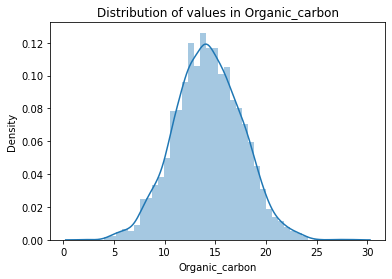

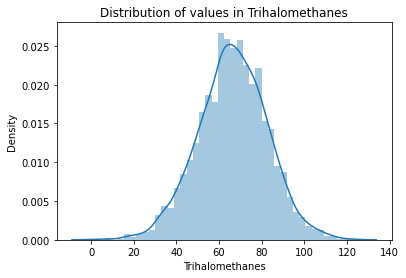

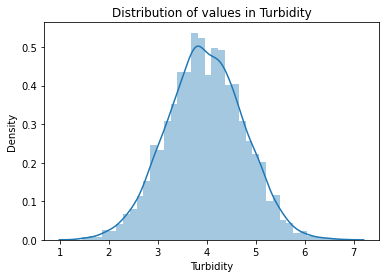

In [148]:
for cols in data_frame.columns:
    if cols!='Potability':
        plt.title('Distribution of values in '+cols)
        sns.distplot(data_frame[cols])
        plt.show()

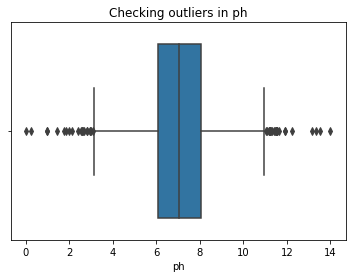

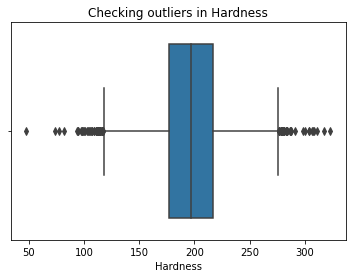

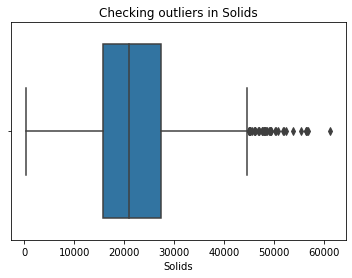

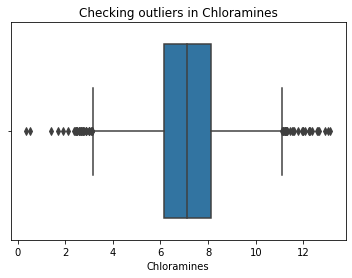

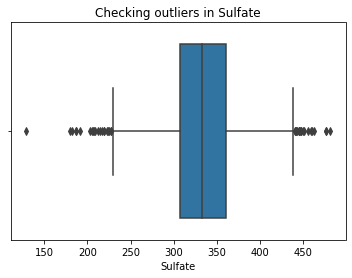

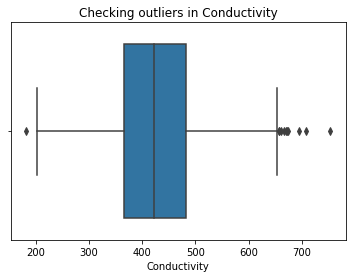

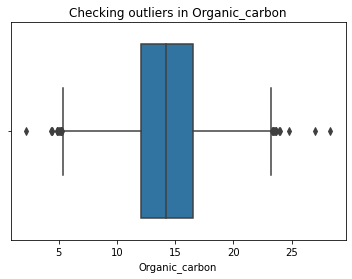

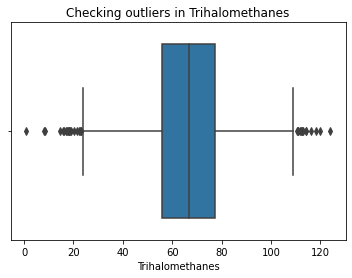

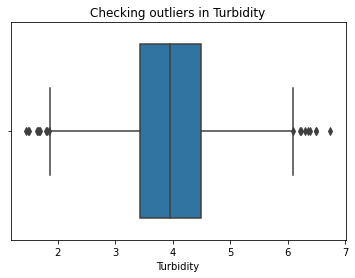

In [150]:
for cols in data_frame.columns:
    if cols!='Potability':
        plt.title('Checking outliers in '+cols)
        sns.boxplot(data_frame[cols])
        plt.show()

- There are 4 intervals(quaters) in a boxplot. The points which are outside the paralle lines are considered as outliers.

In [151]:
#saving the dataframe
data_frame.to_csv('input_data_water_quality_prediction.csv',index=False)